#### `Cross-entropy` loss function

Recall the setup

* Input $x$
* Linear regression $y_{\text{pred}}=ax+b$
* Convert to probability $h(y_{\text{pred}})=\frac{1}{1+e^{-y_{\text{pred}}}}$

Cross-entropy loss for `one sample` is

$$J=-y_{\text{act}}\log(h(y_{\text{pred}}))-(1-y_{\text{act}})\log(1-h(y_{\text{pred}}))$$

where $y_{\text{act}}$ is either 1 or 0

#### `Intuition`

Cross-entropy makes cost high if wrong and confident predictions are made, and makes cost low if correct and confident predictions are made

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

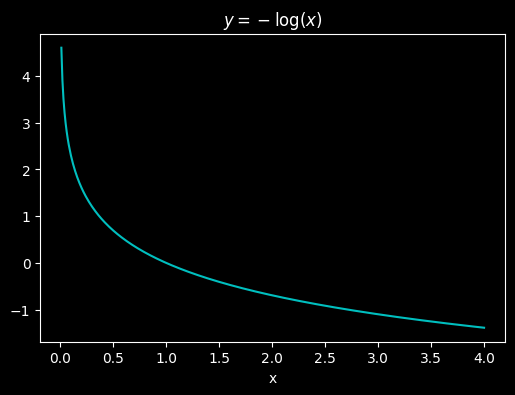

In [20]:
x_values = np.linspace(0.01, 4, 400)
y_values = -np.log(x_values)

plt.figure(figsize=(6, 4))
plt.plot(x_values, y_values, color='c')
plt.xlabel('x')
plt.title('$y=-\log(x)$')
plt.show()

#### Derivation of `gradient` w.r.t. parameters

(1) differentiate $J$ w.r.t. $h(y_{\text{pred}})$

$$\frac{dJ}{dh(y_{\text{pred}})}=-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}$$

(2) differentiate $J$ w.r.t. $y_{\text{pred}}$ using chain rule

$$\begin{align*}
\frac{dJ}{dy_{\text{pred}}}&=\frac{dJ}{dh(y_{\text{pred}})}\cdot \frac{dh(y_{\text{pred}})}{dy_{\text{pred}}}\\
&=\left(-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}\right)\cdot -h(y_{\text{pred}})^2\cdot \left(1-\frac{1}{h(y_{\text{pred}})}\right)\\
&=\left(-\frac{y_\text{act}}{h(y_{\text{pred}})}+\frac{1-y_{\text{act}}}{1-h(y_{\text{pred}})}\right)\cdot h(y_{\text{pred}})\cdot \left(1-h(y_{\text{pred}})\right)\\
&=-y_\text{act}\cdot \left(1-h(y_\text{pred})\right)+(1-y_{\text{act}})\cdot h(y_{\text{pred}})\\
&=\color{red}{h(y_{\text{pred}})-y_{\text{act}}}
\end{align*}$$

(3) differentiate $J$ w.r.t. $a$ using chain rule

$$\begin{align*}
\frac{dJ}{da}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{da}\\
&=\color{red}{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot x}
\end{align*}$$

Similarly

$$\begin{align*}
\frac{dJ}{db}&=\frac{dJ}{dy_{\text{pred}}}\cdot \frac{dy_{\text{pred}}}{db}\\
&=\color{red}{\left(h(y_{\text{pred}})-y_{\text{act}}\right)\cdot 1}
\end{align*}$$

#### Putting everything into `Python`

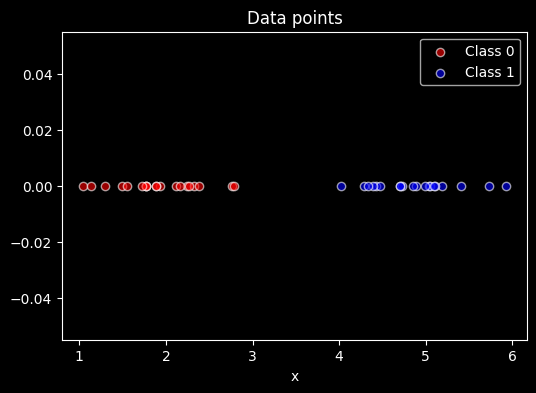

In [21]:
np.random.seed(42)

# Generate data for class 0 (centered around 2)
mean_class0 = 2
std_class0 = 0.5
num_points = 20
class0_data = np.random.normal(mean_class0, std_class0, num_points)  # shape (20,)

# Generate data for class 1 (centered around 5)
mean_class1 = 5
std_class1 = 0.5
class1_data = np.random.normal(mean_class1, std_class1, num_points)  # shape (20,)

# Combine data
x = np.concatenate([class0_data, class1_data])  # shape (40,)
y = np.array([0] * num_points + [1] * num_points)  # shape (40,)

plt.figure(figsize=(6, 4))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

plt.xlabel('x')
plt.title('Data points')
plt.legend()
plt.show()

Iteration 0: Loss = 0.6931471805599453
Iteration 1000: Loss = 0.15238702261169718
Iteration 2000: Loss = 0.08887242077824188
Iteration 3000: Loss = 0.06423030272704132
Iteration 4000: Loss = 0.05095931876396744
Iteration 5000: Loss = 0.04258300998864643
Iteration 6000: Loss = 0.036775427198827364
Iteration 7000: Loss = 0.03249067056159806
Iteration 8000: Loss = 0.029186708477152323
Iteration 9000: Loss = 0.026553580603758814


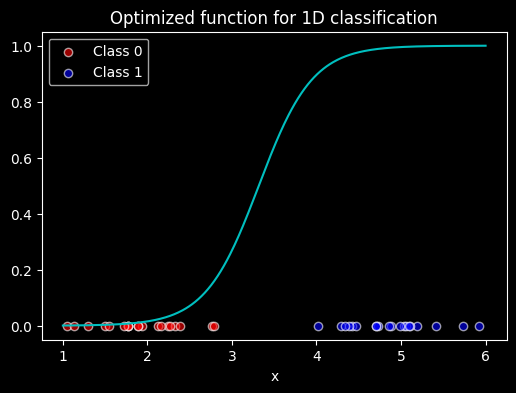

In [22]:
# Initial guess
a = 0
b = 0
learning_rate = 0.05
num_iterations = 10000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Store loss values
loss_values = []

# Training loop
for i in range(num_iterations):
    # Forward pass
    y_pred = a * x + b  # shape (40,)
    h_pred = sigmoid(y_pred)  # shape (40,)

    # Compute loss (cross entropy)
    loss = np.mean(-y*np.log(h_pred) - (1 - y)*np.log(1 - h_pred))

    loss_values.append(loss)

    # Backward pass (compute gradients)
    da = np.mean((h_pred - y) * x)  # scalar
    db = np.mean((h_pred - y) * 1)

    # Update parameters
    a -= learning_rate * da
    b -= learning_rate * db

    # Print loss every several iterations
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss}')

decision_boundary_x = np.linspace(1, 6, 400)
decision_boundary_y = sigmoid((a * decision_boundary_x + b))

plt.figure(figsize=(6, 4))
plt.scatter(class0_data, np.zeros(num_points), color='red', label='Class 0', alpha=0.6, edgecolors='w')
plt.scatter(class1_data, np.zeros(num_points), color='blue', label='Class 1', alpha=0.6, edgecolors='w')

plt.plot(decision_boundary_x, decision_boundary_y, color='c')

plt.xlabel('x')
plt.title('Optimized function for 1D classification')
plt.legend()
plt.show()